In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_attack_board(free_cell, queens_coords):
    chess_board = np.zeros((8, 8))
    chess_board[list(free_cell)[0]] = 1
    for i, j in queens_coords:
        chess_board[i][j] = 2
    return chess_board

def visualize_chess_board(attack_map):
    cmap = plt.cm.colors.ListedColormap(["white", "blue", "red"])
    bounds = [-0.5, 0.5, 1.5, 2.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    plt.imshow(attack_map, cmap=cmap, norm=norm, interpolation="nearest")
    plt.title("Chess Board with Attack Map")
    plt.colorbar(ticks=[0, 1, 2])
    plt.show()

In [3]:
diagonals = dict(([i, []] for i in range(30)))
chess_board = set()

for i in range(8):
    for j in range(8):
        chess_board.add((i, j))
        
        straight_diagonal_idx = 7 - i + j
        reverse_diagonal_idx = 29 - i - j
                    
        diagonals[straight_diagonal_idx].append((i, j))
        diagonals[reverse_diagonal_idx].append((i, j))

## Naive Solution

In [4]:
good_boards = []
good_queens_coords = []
both_coords = []

def put_queen(cur_chess_board, cur_queens_coords, first_loop=False):
    if len(cur_chess_board) == 0:
        return 
    if len(cur_queens_coords) == 7:
        good_boards.append(cur_chess_board)
        good_queens_coords.append(cur_queens_coords)
        both_coords.append(set.union(cur_chess_board, cur_queens_coords))
        return 
    
    for i, queen_coord in enumerate(cur_chess_board):
        if first_loop:
            print(f"{i}) {queen_coord}")
        
        board = cur_chess_board.copy()
        queens_coords = cur_queens_coords.copy()
        
        queens_coords.add(queen_coord)
        i, j = queen_coord
    
        for k in range(8):
            if (i, k) in board:
                board.remove((i, k))
            if (k, j) in board:
                board.remove((k, j))
        
        queen_diagonals_coords = (*diagonals[7 - i + j], *diagonals[29 - i - j])
        for coords in queen_diagonals_coords:
            if coords in board:
                board.remove(coords)
        
        put_queen(board, queens_coords)
    
    return 

In [5]:
put_queen(chess_board, set(), True)

0) (4, 0)
1) (3, 4)
2) (4, 3)
3) (3, 1)
4) (3, 7)
5) (5, 4)
6) (4, 6)
7) (5, 1)
8) (5, 7)
9) (0, 2)
10) (0, 5)
11) (2, 2)
12) (1, 0)
13) (1, 6)
14) (2, 5)
15) (1, 3)
16) (7, 4)
17) (6, 2)
18) (7, 1)
19) (7, 7)
20) (6, 5)
21) (4, 2)
22) (3, 0)
23) (4, 5)
24) (3, 3)
25) (5, 0)
26) (5, 6)
27) (3, 6)
28) (5, 3)
29) (0, 1)
30) (0, 7)
31) (2, 4)
32) (1, 2)
33) (0, 4)
34) (2, 1)
35) (2, 7)
36) (1, 5)
37) (6, 1)
38) (7, 0)
39) (6, 4)
40) (7, 3)
41) (6, 7)
42) (7, 6)
43) (3, 2)
44) (4, 1)
45) (4, 7)
46) (3, 5)
47) (5, 2)
48) (4, 4)
49) (5, 5)
50) (0, 0)
51) (1, 1)
52) (0, 3)
53) (2, 0)
54) (1, 4)
55) (0, 6)
56) (2, 3)
57) (1, 7)
58) (2, 6)
59) (7, 2)
60) (6, 0)
61) (6, 6)
62) (7, 5)
63) (6, 3)


In [6]:
N = len(good_queens_coords)
print(N)

fact_7 = 2*3*4*5*6*7
print(N / fact_7)

3709440
736.0


In [7]:
sorted_queens = set(map(lambda x: tuple(sorted(x)), good_queens_coords))
print(len(sorted_queens))

sorted_both = set(map(lambda x: tuple(sorted(x)), both_coords))
print(len(sorted_both))

736
92


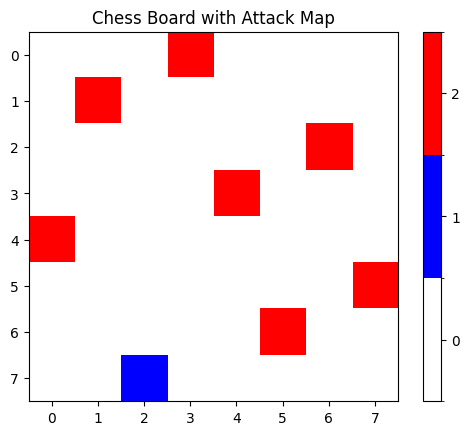

In [8]:
board_idx = 111244
board_to_show = good_boards[board_idx]
queen_coords_to_show = good_queens_coords[board_idx]

attack_board = get_attack_board(board_to_show, queen_coords_to_show)
visualize_chess_board(attack_board)

In [9]:
lens_of_boards = [len(board) for board in good_boards]
print(len(lens_of_boards))
print(lens_of_boards.count(1))

3709440
3709440


In [10]:
736.0/4

184.0

## test

In [11]:
# good_queens_coords = []
# 
# def put_queen(cur_chess_board, cur_queens_coords: list, first_loop=False):
#     if len(cur_chess_board) == 0:
#         return {}
#     if len(cur_queens_coords) == 7:
#         good_queens_coords.append(cur_queens_coords)
#         free_cell = cur_chess_board.pop()
#         return {}
#     
#     available_queen_coords = set()
#     cur_board_to_copy = cur_chess_board.copy()
#     counter = 0
#     while cur_chess_board:
#         if first_loop:
#             counter += 1
#             print(f"{counter}")
#             
#         queen_coord = cur_chess_board.pop()
#         available_queen_coords.add(queen_coord)
#     
#         board = cur_board_to_copy.copy()
#         queens_coords = cur_queens_coords.copy()
#         
#         queens_coords.append(queen_coord)
#         i, j = queen_coord
#     
#         for k in range(8):
#             if (i, k) in board:
#                 board.remove((i, k))
#             if (k, j) in board:
#                 board.remove((k, j))
#         
#         queen_diagonals_coords = (*straight_diagonals[7 - i + j], *reverse_diagonals[14 - i - j])
#         for coords in queen_diagonals_coords:
#             if coords in board:
#                 board.remove(coords)
#         
#         prev_coords = put_queen(board, queens_coords)
#         available_queen_coords = available_queen_coords.union(prev_coords)
#     
#         for coord in prev_coords:
#             if coord in cur_chess_board:
#                 cur_chess_board.remove(coord)
#                 
#     return available_queen_coords

In [12]:
# c_b = chess_board.copy()
# put_queen(c_b, [], True)

In [13]:
# N = len(good_queens_coords)
# print(N*5)

In [14]:
# board_idx = 113
# board_to_show = good_boards[board_idx]
# queen_coords_to_show = good_queens_coords[board_idx]
# 
# attack_board = get_attack_board(board_to_show, queen_coords_to_show)
# visualize_chess_board(attack_board)

In [15]:
# a = {1, 2, 3}
# a.add((1, 5, 2))
# a

## acceleration 8! times

In [16]:
good_coords = []

def get_queen_attack_coords(i, j):
    coords = {*diagonals[7 - i + j], *diagonals[29 - i - j]}
    for k in range(8):
        coords.add((i, k))
        coords.add((k, j))
    return coords

def put_queen(available_coords: set, cur_queens_coords: list):    
    if len(available_coords) < 8 - len(cur_queens_coords):
        return
    if len(cur_queens_coords) == 7:
        cur_queens_coords.append(available_coords.pop())
        good_coords.append(cur_queens_coords)
        return 
    
    coords = available_coords.pop()
    available_coords.add(coords)
    
    for queen_coord in get_queen_attack_coords(*coords):
        if queen_coord not in available_coords:
            continue
            
        available_coords.discard(queen_coord)
        
        board = available_coords.copy()
        queens_coords = cur_queens_coords.copy()
        queens_coords.append(queen_coord)

        for queen_attack_coords in get_queen_attack_coords(*queen_coord):
            board.discard(queen_attack_coords)
        
        put_queen(board, queens_coords)
    
    return 

In [17]:
chess_board_copy = chess_board.copy()
put_queen(chess_board_copy, [])

In [18]:
N = len(good_coords)
print(N)

92


In [19]:
good_coords[0]

[(4, 0), (3, 4), (5, 7), (6, 5), (1, 1), (0, 3), (2, 6), (7, 2)]

In [20]:
# good_boards = []
# good_queens_coords = []
# global_counter = 0
# 
# def get_queen_attack_coords(i, j):
#     coords = {*straight_diagonals[7 - i + j], *reverse_diagonals[14 - i - j]}
#     for k in range(8):
#         coords.add((i, k))
#         coords.add((k, j))
#     return coords
# 
# def put_queen(available_coords: set, cur_queens_coords: list):
#     global global_counter 
#     
#     if len(available_coords) < 8 - len(cur_queens_coords):
#         return set()
#     
#     if len(cur_queens_coords) == 7:
#         global_counter += 1
#         rotate_90, rotate_180, rotate_270 = [], [], []
#         for i, j in cur_queens_coords:
#             rotate_90.append((j, 7 - i))
#             rotate_180.append((7 - i, 7 - j))
#             rotate_270.append((7 - j, i))
#         
#         good_queens_coords.append(cur_queens_coords)
#         good_queens_coords.append(rotate_90)
#         good_queens_coords.append(rotate_180)
#         good_queens_coords.append(rotate_270)
#         
#         good_boards.append(available_coords)
#         return {*rotate_90, *rotate_180, *rotate_270}
#     
#     coords = available_coords.pop()
#     available_coords.add(coords)
#     cur_forbidden_coords = set()
#     
#     for queen_coord in get_queen_attack_coords(*coords):
#         if queen_coord not in available_coords:
#             continue
#             
#         available_coords.discard(queen_coord)
#         board = available_coords.copy()
#         queens_coords = cur_queens_coords.copy()
#         queens_coords.append(queen_coord)
# 
#         for queen_attack_coords in get_queen_attack_coords(*queen_coord):
#             board.discard(queen_attack_coords)
#         
#         forbidden_coordinates = put_queen(board, queens_coords)
#         cur_forbidden_coords = set.union(cur_forbidden_coords, forbidden_coordinates)
#         for f_c in forbidden_coordinates:
#             available_coords.discard(f_c)
#     
#     return cur_forbidden_coords

In [21]:
# 92*4

In [22]:
# board_idx = 1
# board_to_show = good_boards[board_idx]
# queen_coords_to_show = good_queens_coords[board_idx]

# for board_to_show, queen_coords_to_show in zip(good_boards, good_queens_coords):
#     attack_board = get_attack_board(board_to_show, queen_coords_to_show)
#     visualize_chess_board(attack_board)

In [23]:
# set(map(lambda c: (c[1], 7 - c[0]), [(1, 3), (3, 4)]))

In [24]:
# def rotate_90_right(coords):
#     rotate_90, rotate_180, rotate_270 = [], [], []
#     for i, j in coords:
#         rotate_90.append((j, 7 - i))
#         rotate_180.append((7 - i, 7 - j))
#         rotate_270.append((7 - j, i))
# 
# def rotate_180_right(i, j):
#     
#     return 7 - i, 7 - j
# 
# def rotate_270_right(i, j):
#     return 7 - j, i
# 
# # Example coordinates
# i, j = 1, 1
# 
# # Perform rotations
# coords_90 = rotate_90_right(i, j)
# coords_180 = rotate_180_right(i, j)
# coords_270 = rotate_270_right(i, j)
# 
# print(f"Original: ({i}, {j})")
# print(f"90 degrees right: {coords_90}")
# print(f"180 degrees right: {coords_180}")
# print(f"270 degrees right: {coords_270}")